# TASK 2 : Prediction using Unsupervised ML
# Predict the optimum number of clusters (K-Means Clustering)
# Submitted by : Avadhut Mohan Shilimkar

Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


# EDA ->Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Since there are no null values, we shall continue to find out the optimum number of clusters.

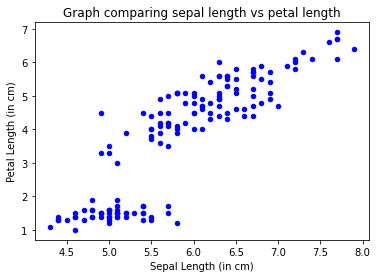

In [6]:
#plotting the data 
df.plot(kind='scatter',x='SepalLengthCm',y='PetalLengthCm',style='o',color='blue')
plt.title('Graph comparing sepal length vs petal length')
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Petal Length (in cm)')
plt.show()

# Finding out the optimum number of clusters for K Means

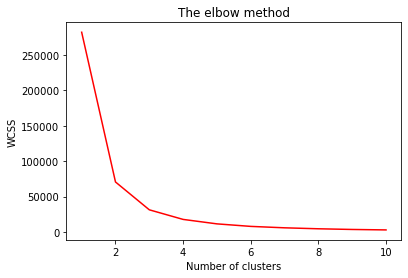

In [7]:
x = df.iloc[:, [0, 1, 2, 3,4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# By plotting the above graph, we can observe from the elbow method that the optimum cluster occurs at the ''elbow''

# Here the within cluster sum of squares (WCSS) doesn't decrese significantly with every iteration.

# From this we will choose number of clusters = 3.

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmeans_fit = kmeans.fit(x)
kmean_pred=kmeans.predict(x)
kmean_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

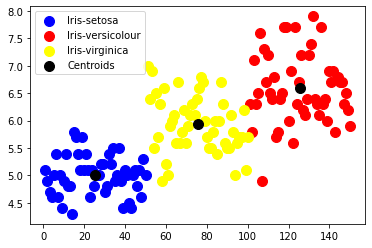

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(x[kmean_pred == 0, 0], x[kmean_pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[kmean_pred == 1, 0], x[kmean_pred == 1, 1],s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[kmean_pred == 2, 0], x[kmean_pred == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')


plt.legend()
plt.show()

# Thus, we have visualized the clusters on the first two columns

# Now below, we have visualized the clusters on different columns.

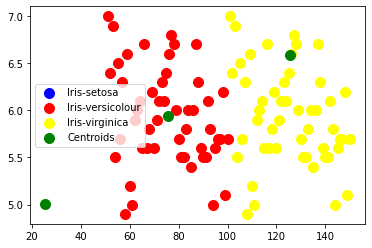

In [10]:
plt.scatter(x[kmean_pred == 3, 0], x[kmean_pred == 3, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[kmean_pred == 2, 0], x[kmean_pred == 2, 1],s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[kmean_pred == 1, 0], x[kmean_pred == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

# Thus, we have predicted the optimum number of clusters and represented it visually from the Iris dataset. 

# Thank You ! 